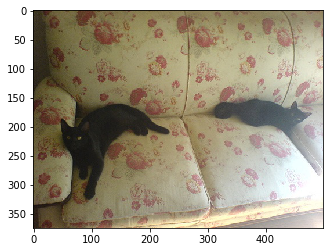

In [16]:
import Utils
img = Utils.readImage("/Users/nishatiwari/PycharmProjects/OpenCV/HW2_Data/JPEGImages/004708.jpg")
window_name="Selctive search for image 000480"
from matplotlib import pyplot as plt
plt.imshow(img)

In [17]:
import cv2 as cv
edge_detection = cv.ximgproc.createStructuredEdgeDetection("/Users/nishatiwari/PycharmProjects/OpenCV/model.yml.gz")

In [18]:
# get the edges
import numpy as np
edges = edge_detection.detectEdges(np.float32(img) / 255.0)
# create an orientation map
orimap = edge_detection.computeOrientation(edges) # suprress edges
edges = edge_detection.edgesNms(edges, orimap)

In [19]:
edge_boxes = cv.ximgproc.createEdgeBoxes()
boxes, scores = edge_boxes.getBoundingBoxes(edges, orimap)

In [20]:
img_with_bboxes=Utils.drawBoxesInImagePredBox(img, 100, boxes,(0,0,255))

Populating the interactive namespace from numpy and matplotlib


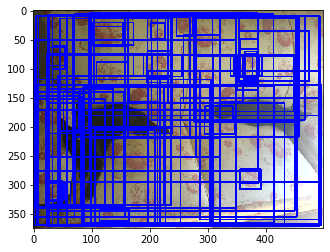

In [21]:
%pylab inline
plt.imshow(img_with_bboxes)
plt.show()

In [22]:
#import Utils as utils
xmlPath='/Users/nishatiwari/PycharmProjects/OpenCV/HW2_Data/Annotations/004708.xml'
GTimageObjects=Utils.parseXMLAndFindObjects(xmlPath)

In [23]:
img_with_gt_bboxes=Utils.drawBoxesInImage(img, len(GTimageObjects), GTimageObjects, (0,255,0))

Populating the interactive namespace from numpy and matplotlib


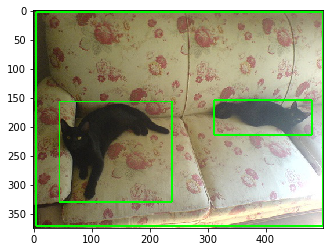

In [24]:
%pylab inline
plt.imshow(img_with_gt_bboxes)
plt.show()

In [25]:
precision, recall, selectedBoxes, =Utils.eval_iou( boxes, GTimageObjects)

In [30]:
img_with_selectedBboxes=Utils.drawBoxesInImagePredBox(img_with_gt_bboxes, len(selectedBoxes), selectedBoxes, (0,0,255))

Populating the interactive namespace from numpy and matplotlib


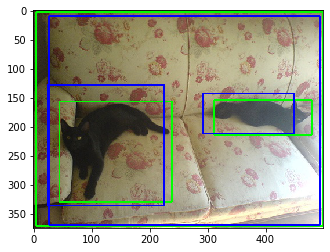

In [31]:
%pylab inline
plt.imshow(img_with_selectedBboxes)
plt.show()

In [32]:
print(precision,recall)

0.0006640106241699867 1.0
